In [90]:
import math
import random
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.neural_network import MLPClassifier
import os
import sys
import time
 
import numpy
 
import theano
import theano.tensor as T

import xlrd
import xlwt
import matplotlib.pyplot as plt

worksheet = xlrd.open_workbook('data800.xlsx')
sheet_names= worksheet.sheet_names() 

sheet1 = worksheet.sheet_by_name('Sheet1')
sheet2 = worksheet.sheet_by_index(0)
v = sheet2.col_values(1)
del v[0]
v2 = sheet2.col_values(2)
del v2[0]
T = sheet2.col_values(3)
del T[0]
Q1 = sheet2.col_values(4)
del Q1[0]
Q2 = sheet2.col_values(5)
del Q2[0]
Q3 = sheet2.col_values(6)
del Q3[0]

shuru=[]
for i in range(len(v)):
    row=[]
    row.append(v[i])
    row.append(v2[i])
    row.append(T[i])
    
    shuru.append(numpy.array(row))
#print(shuru)
q1=[]
for i in range(len(Q1)):
    q1.append(int(Q1[i]))
q2=[]
for i in range(len(Q2)):
    q2.append(int(Q2[i]))
q3=[]
for i in range(len(Q3)):
    q3.append(int(Q3[i]))

shucu=[]
for i in range(len(v)):
    row=[]
    row.append(q1[i])
    row.append(q2[i])
    row.append(q3[i])
    
    shucu.append(numpy.array(row))
#Q1    
X = numpy.array(shuru)
y = numpy.array(q1)
#digits = load_digits()
#X = digits.data
#y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
random.seed(0)
print(y_train)
Y_train=[]
for i in y_train:
    s=[i]
    Y_train.append(s)

[144 165 220 142 206 164 106 191 196 249 154 108 202 126 224 230 109 188
 120 244 163 137 108 123 129 227 165 132 155 240 240 205 125 100 228 234
 231 121 107 259 109 114 220 196 197 199 124 119 146 134 201 200 209 169
 190 221 199 109 102 182 131 182 218 213 190 143 216 116 156 211 214 128
 124 242 117 181 179 196 144 112 124 211 153 228 207 150 152 197 197 162
 136 118 215 153 205 155 130 194 139 106 135 246 137 149 156 178 186 139
 149 189 167 146 123 245 171 117 224 244 209 111 135 116 224 190 223 112
 165 169 207 208 219 193 246 217 213 176 232 225 163 167 169 248 173 247
 108 179 162 134 228 148 112 122 161 221 191 213 189 129 230 183 188 157
 241 217 133 188 258 185 233 202 144 175 171 170 250 196 182 122 115 152
 137 152 215 159 191 218 183 142 116 243 150 149 147 222 145 215 111 116
 221 142 198 206 176 172 106 233 242 215 239 223 186 167 123 205 204 192
 145 192 187  97 246 202 131 186 160 123 177 112 199 179 121 162 170 111
 152 172 219 193 179 117 183 101 127 221 186 231 19

In [91]:
#coding:utf-8
'''
Created on 2016/4/27
@author: Gamer Think
'''
import numpy as np
 
#定义双曲函数和他们的导数
def tanh(x):
    return np.tanh(x)
 
def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2
 
def logistic(x):
    return 1/(1 + np.exp(-x))
 
def logistic_derivative(x):
    return logistic(x)*(1-logistic(x))
def relu(x): 
    
    return np.maximum(x, 0.0)
def relu_derivative(x):
    return 1
 
#定义NeuralNetwork 神经网络算法
class NeuralNetwork:
    #初始化，layes表示的是一个list，eg[10,10,3]表示第一层10个神经元，第二层10个神经元，第三层3个神经元
    def __init__(self, layers, activation='relu'):
        """
        :param layers: A list containing the number of units in each layer.
        Should be at least two values
        :param activation: The activation function to be used. Can be
        "logistic" or "tanh"
        """
        if activation == 'logistic':
            self.activation = logistic
            self.activation_deriv = logistic_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
        elif activation == 'relu':
            self.activation = relu
            self.activation_deriv = relu_derivative
 
        self.weights = []
        #循环从1开始，相当于以第二层为基准，进行权重的初始化
        for i in range(1, len(layers) - 1):
            #对当前神经节点的前驱赋值
            self.weights.append((2*np.random.random((layers[i - 1] + 1, layers[i] + 1))-1)*0.25)
            #对当前神经节点的后继赋值
            self.weights.append((2*np.random.random((layers[i] + 1, layers[i + 1]))-1)*0.25)
    
    #训练函数   ，X矩阵，每行是一个实例 ，y是每个实例对应的结果，learning_rate 学习率， 
    # epochs，表示抽样的方法对神经网络进行更新的最大次数
    def fit(self, X, y, learning_rate=0.00001, epochs=10000):
        X = np.atleast_2d(X) #确定X至少是二维的数据
        temp = np.ones([X.shape[0], X.shape[1]+1]) #初始化矩阵
        temp[:, 0:-1] = X  # adding the bias unit to the input layer
        X = temp
        y = np.array(y) #把list转换成array的形式
 
        for k in range(epochs):
            #随机选取一行，对神经网络进行更新
            i = np.random.randint(X.shape[0]) 
            a = [X[i]]
            #print(a)
            #完成所有正向的更新
            for l in range(len(self.weights)):
                a.append(self.activation(np.dot(a[l], self.weights[l])))
                #print(self.activation(10))
            #
            error = y[i] - a[-1]
            #print( a[-1])
            deltas = [error * self.activation_deriv(a[-1])]
 
            #开始反向计算误差，更新权重
            for l in range(len(a) - 2, 0, -1): # we need to begin at the second to last layer
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_deriv(a[l]))
            deltas.reverse()
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
    
    #预测函数            
    def predict(self, x):
        x = np.array(x)
        #print(x)
        temp = np.ones(x.shape[0]+1)
        #print(temp)
        temp[0:-1] = x
        a = temp
        for l in range(0, len(self.weights)):
            #print(np.dot(a, self.weights[l]))
            a = self.activation(np.dot(a, self.weights[l]))
           
        return a


In [94]:

'''
Created on 2016/4/27
@author: Gamer Think
'''
 
import numpy as np

'''
[2,2,1]
第一个2:表示 数据的纬度，因为是二维的，表示两个神经元，所以是2
第二个2：隐藏层数据纬度也是2，表示两个神经元 
1：表示输入为一个神经元
tanh:表示用双曲函数里的tanh函数
'''
nn = NeuralNetwork([3,1000,1], 'relu')
#X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X=X_train
#y = np.array([0, 1, 1, 0])
y=y_train
#print(X)
#print(y)
print(y_test)
y_predict=[]
nn.fit(X, y)
for i in X_test:
    y_predict.append(int(nn.predict(i)))
print(y_predict)
y_ad=0
for i in range(len(X_test)):
    y_ad+=np.sqrt((y_test[i]-y_predict[i])**2)
    #print(y_ad)
print(y_ad/len(y_test))


[178 189 225 205 116 153 203 138 238 216 202 231 229 130 191 180 135 154
 102 198 140 192 192 237 182 131 156 244 244 183 204 161 249 198 148 234
 113 181 144 142 195 104 137 136 239 128 227 203 141 160 140 252 239 142
 157 166 232 203 127 211 137 149 237 157 145 145 224 118 116 217 170 201
 187 124 104 105 140 200 124 154 184 130 107 147 130 132 135 177 138 178
 230 229 121 147 180 134 226 242 159 201 101 139 217 209 159 155 122 207
 127 141 210 120 182 154 166 194 167 186 212 214 117 113 236 133 181 243
 214 163 141 223 188 152 171 239 133 130 121 216 235 200 122 155 146 112
 150 192 232 176 126 234 122 148 143 144 261 128 227 210 120 222 236 122
 110 206 179 224 226 187 220 119 219 212 166 157 174 209 157 129 191 172
 202 229]
[177, 188, 225, 205, 116, 152, 203, 137, 237, 215, 200, 231, 228, 129, 189, 178, 135, 153, 102, 197, 140, 191, 192, 236, 182, 131, 155, 244, 242, 183, 204, 160, 247, 197, 147, 234, 112, 181, 143, 141, 195, 104, 137, 135, 237, 128, 226, 203, 140, 160, 139, 250,

Q1预测结果图


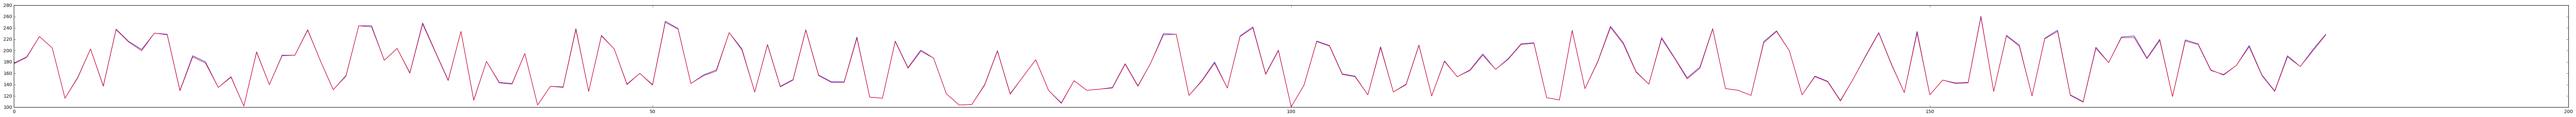

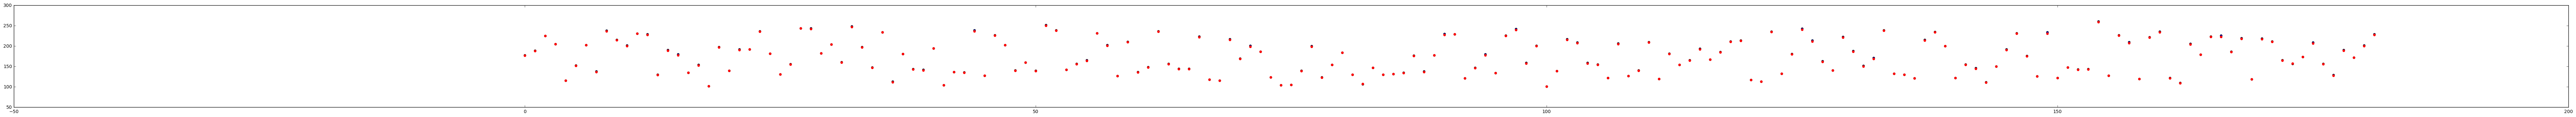

In [96]:
print("Q1预测结果图")
x = range(len(y_predict))
y=y_test
y2=y_predict
plt.figure(figsize=(100,4))
plt.plot(x,y)
plt.plot(x,y2,color='red')
#plt.plot(x,y3,color='black',linestyle='--')
plt.show()
x = range(len(y_predict))


y=y_test
y2=y_predict
plt.figure(figsize=(100,4))
plt.scatter(x,y)
plt.scatter(x,y2,color='red')
#plt.plot(x,y3,color='black',linestyle='--')
plt.show()